# **Logistic Regression Classifier for Student Admission (From Scratch)**

# What This Notebook Covers


*   How logistic regression predicts probabilities
*   Cost & gradient computation for classification

*   How to visualize a decision boundary
*   How accuracy is calculated

*   Comparison with sklearn








# Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create Sample Dataset (Exam Scores vs Admission)

You can later replace this with a real dataset from Kaggle if you want.

In [32]:
data = {
    "Exam1": [34, 78, 50, 64, 88, 92, 60, 80, 45, 75, 48, 85, 66, 70, 40, 90, 62, 55, 52, 95],
    "Exam2": [78, 65, 52, 60, 95, 98, 70, 88, 50, 85, 48, 90, 75, 78, 40, 95, 65, 60, 54, 98],
    "Admitted": [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]
}


df = pd.DataFrame(data)
print(df.head())

   Exam1  Exam2  Admitted
0     34     78         0
1     78     65         1
2     50     52         0
3     64     60         0
4     88     95         1


# Visualize the Data

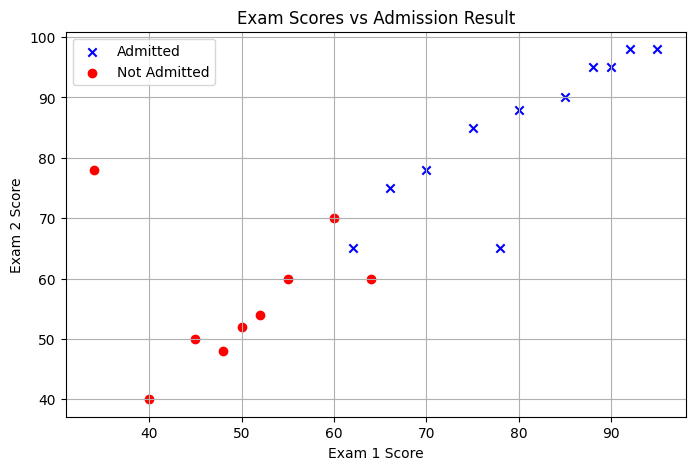

In [33]:
plt.figure(figsize=(8,5))
admitted = df[df["Admitted"] == 1]
not_admitted = df[df["Admitted"] == 0]

plt.scatter(admitted["Exam1"], admitted["Exam2"], c='blue', marker='x', label='Admitted')
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], c='red', marker='o', label='Not Admitted')
plt.title("Exam Scores vs Admission Result")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.grid(True)
plt.show()

# Prepare the Data

In [34]:
x = df[["Exam1" , "Exam2"]]
y = df["Admitted"].values.reshape(-1, 1)
m, n = x.shape


# Feature scaling
x = (x- np.mean(x, axis=0)) / np.std(x, axis=0)

# Add intercept term
x = np.hstack((np.ones((m,1)), x))  # shape (m, n+1)



# Sigmoid Function

In [35]:
def sigmoid(z):

  return 1 / (1 + np.exp(-z))


# Cost Function

In [36]:
def compute_cost(x, y, w):
  m = len(y)
  h = sigmoid(np.dot(x, w))
  # Avoid log(0) or log(1) issues by clipping values
  h = np.clip(h, 1e-10, 1 - 1e-10)
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
  return cost

# Gradient Descent

In [37]:
def compute_gradient(x, y, w):
    m = len(y)
    h = sigmoid(np.dot(x, w))
    gradient = (1/m) * np.dot(x.T, (h - y))
    return gradient

# Compute Gradient

In [38]:
def gradient_descent(x, y, w_in, alpha, num_iters):
    w = w_in
    cost_history = []

    for i in range(num_iters):
        grad = compute_gradient(x, y, w)
        w -= alpha * grad

        if i % 1000 == 0:
            cost = compute_cost(x, y, w)
            cost_history.append(cost)
            print("Iteration {i:5d}: Cost = {cost.item():.6f}")

    return w, cost_history

# Initialize and Train the Model

In [39]:
w_init = np.zeros((n + 1, 1))
alpha = 0.1
iterations = 10000

print("\nTraining Logistic Regression Model...")
w_final, cost_history = gradient_descent(x, y, w_init, alpha, iterations)

print("\nTraining Complete!")
print( w_final)


Training Logistic Regression Model...
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}
Iteration {i:5d}: Cost = {cost.item():.6f}

Training Complete!
[[2.44057264]
 [6.67126081]
 [3.55976071]]


# Plot Cost vs Iterations

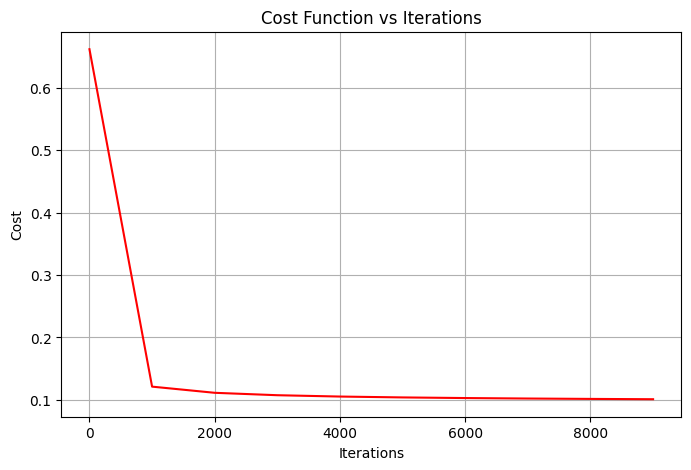

In [40]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0, len(cost_history))*1000, cost_history, color='red')
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Predict Function

In [41]:
def predict(x, w):
    probabilities = sigmoid(np.dot(x, w))
    return [1 if p >= 0.5 else 0 for p in probabilities]

# Evaluate Model

In [42]:
y_pred = predict(x, w_final)
accuracy = np.mean(y_pred == y.flatten()) * 100
print(f"\nModel Accuracy: {accuracy:.2f}%")


Model Accuracy: 95.00%


# Decision Boundary Visualization

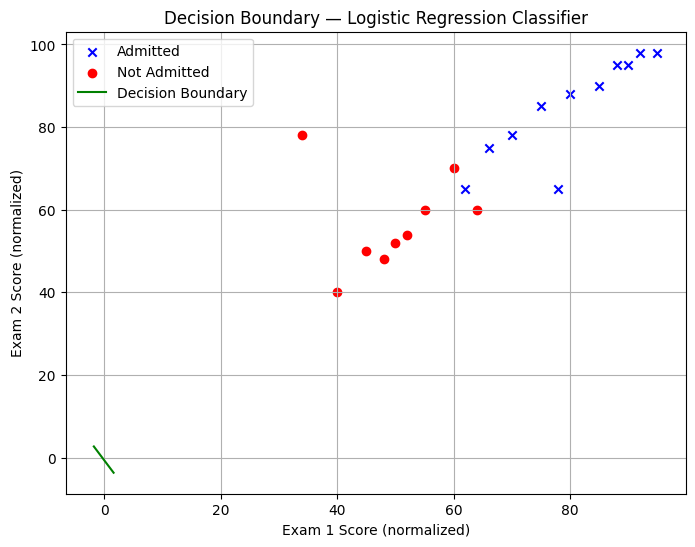

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(admitted["Exam1"], admitted["Exam2"], c='blue', marker='x', label='Admitted')
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], c='red', marker='o', label='Not Admitted')

# Decision boundary
x_values = np.array([min(x[:,1]), max(x[:,1])])
y_values = -(w_final[0] + w_final[1]*x_values) / w_final[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='green')

plt.title("Decision Boundary — Logistic Regression Classifier")
plt.xlabel("Exam 1 Score (normalized)")
plt.ylabel("Exam 2 Score (normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Compare with scikit-learn Logistic Regression

In [44]:
model = LogisticRegression()
model.fit(df[["Exam1", "Exam2"]], df["Admitted"])
y_pred_sklearn = model.predict(df[["Exam1", "Exam2"]])

accuracy_sklearn = accuracy_score(df["Admitted"], y_pred_sklearn) * 100
print(f"Sklearn Model Accuracy: {accuracy_sklearn:.2f}%")

Sklearn Model Accuracy: 95.00%


# Predict Admission for New Student

In [45]:
new_student = np.array([[85, 90]])  # example

# Calculate mean and std from the original training data features (df[["Exam1", "Exam2"]])

mean_features = df[["Exam1", "Exam2"]].mean(axis=0).values
std_features = df[["Exam1", "Exam2"]].std(axis=0).values

# Scale the new student's scores using these pre-calculated mean and std values
new_student_scaled = (new_student - mean_features) / std_features

new_student_scaled = np.hstack((np.ones((1,1)), new_student_scaled))

prob = sigmoid(np.dot(new_student_scaled, w_final))
prediction = 1 if prob >= 0.5 else 0
print(f"\nNew Student Scores: {new_student}")
print(f"Predicted Admission Probability: {prob[0][0]*100:.2f}%")
print("Predicted Result:", "Admitted" if prediction == 1 else "Not Admitted ")


New Student Scores: [[85 90]]
Predicted Admission Probability: 100.00%
Predicted Result: Admitted
